# Training RGZ images

Extract images to be used to as a way to visualise the SOM and their heat maps

In [17]:
import pandas as pd
import numpy as np

In [81]:
rgz = pd.read_csv('FIRST_Cata_Images.csv')

/Users/gal16b/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [82]:
rgz['label'] = rgz['radio.number_components'].astype(str)+'_'+rgz['radio.number_peaks'].astype(str)

In [83]:
df = rgz.groupby('label').nunique()

In [84]:
labels = ['1_1','1_2','1_3','2_2','2_3','3_3']

In [85]:
df = rgz[rgz['label'].isin(labels)]

In [86]:
df.head()

,Unnamed: 0,catalog_id,rgz_name,zooniverse_id,overedge,radio.ra,radio.dec,consensus.ir_ra,consensus.ir_dec,consensus.n_total,...,SDSS.spec_redshift,SDSS.spec_redshift_err,SDSS.morphological_class,SDSS.spectral_class,SDSS.number_matches,duplicate_sources.share_components,duplicate_sources.match_components,duplicate_sources.WISE_cat_mismatch,filename,label
0,0,1,RGZJ134538.5+232247,ARG000255t,0,206.410362,23.379914,-99.000000,-99.000000,79,...,-99.0,-99.0,-99,-99,0,-99,-99,-99,RGZJ134538.5+232247s.fits,1_1
1,1,2,RGZJ134541.2+232253,ARG000255t,0,206.422120,23.381925,206.421792,23.381597,79,...,-99.0,-99.0,-99,-99,0,-99,-99,-99,RGZJ134541.2+232253s.fits,1_2
2,2,3,RGZJ105651.3+232256,ARG000255u,0,164.213999,23.382186,164.214055,23.382493,36,...,-99.0,-99.0,G,-99,1,-99,-99,-99,RGZJ105651.3+232256s.fits,1_1
3,3,4,RGZJ105654.2+232335,ARG000255u,0,164.226081,23.393043,164.226006,23.393103,36,...,-99.0,-99.0,-99,-99,0,-99,-99,-99,RGZJ105654.2+232335s.fits,1_1
4,4,5,RGZJ164643.0+232254,ARG000255v,0,251.679244,23.382107,251.679248,23.382187,42,...,-99.0,-99.0,G,-99,1,-99,-99,-99,RGZJ164643.0+232254s.fits,1_1


In [87]:
df = df[(df['consensus.radio_level']>0.6) & (df['consensus.ir_level']>0.6)]

In [88]:
df.shape

(50539, 77)

/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


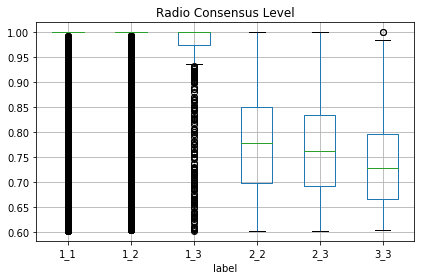

In [89]:
fig, ax = plt.subplots(1,1)

ax = df.boxplot(by='label', column='consensus.radio_level', ax=ax)
ax.set(title='Radio Consensus Level')

fig.suptitle('')
fig.tight_layout()
fig.show()

/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


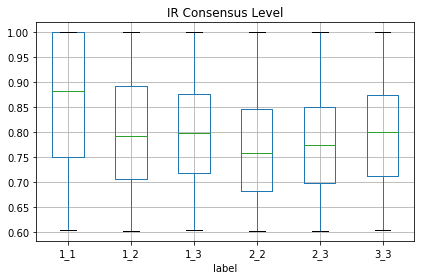

In [90]:
fig, ax = plt.subplots(1,1)

ax = df.boxplot(by='label', column='consensus.ir_level', ax=ax)
ax.set(title='IR Consensus Level')


fig.suptitle('')
fig.tight_layout()
fig.show()

In [91]:
train = df.sample()

In [92]:
print([(i[0],i[1].shape) for i in train.groupby('label')])

[('1_1', (1, 77))]


In [93]:
from sklearn.model_selection import train_test_split

strat = [] 
for l, c in zip(labels, [5000, 1000, 1000, 1000, 1000, 1000]):
    strat += [l]*c

train, test = train_test_split(df)


In [94]:
print([(i[0],i[1].shape) for i in df.groupby('label')])

[('1_1', (36071, 77)), ('1_2', (8058, 77)), ('1_3', (858, 77)), ('2_2', (4072, 77)), ('2_3', (672, 77)), ('3_3', (808, 77))]


In [95]:
test =pd.concat( [df[df['label']==i].sample(n=2000, replace=True).drop_duplicates() for i in labels ]  )

In [96]:
test.shape

(7440, 77)

In [97]:
print([(i[0],i[1].shape) for i in test.groupby('label')])

[('1_1', (1941, 77)), ('1_2', (1768, 77)), ('1_3', (771, 77)), ('2_2', (1582, 77)), ('2_3', (634, 77)), ('3_3', (744, 77))]


In [98]:
test.to_csv('RGZ_Test_Images_Dataframe.csv')